<a href="https://colab.research.google.com/github/GianmarcoLattaruolo/Vision_Project/blob/main/MappaGeografica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Geographic Map**

In [1]:
# with this line we can check if we are in colab or not
import os
import sys
from pathlib import Path
in_colab = 'google.colab' in sys.modules
print("are we in Colab?:",in_colab)

cwd = Path(os.getcwd())
if in_colab:
    from google.colab import drive
    drive.mount('/gdrive')
    !pip install -q condacolab
    import condacolab
    condacolab.install()
    os.chdir('/gdrive/MyDrive/GeoEstimation')
    
else:
    #our defult wd in local should be Vision_Project
    if str(cwd)[-14:] == 'Vision_Project':
        os.chdir(cwd / 'GeoEstimation')
    sys.path.append(cwd / 'GeoEstimation')

are we in Colab?: True
Mounted at /gdrive
⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:19
🔁 Restarting kernel...


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Installing the library geopandas may cause problems on windows. In case pip doesn't work, take a look here: https://geoffboeing.com/2014/09/using-geopandas-windows/

In [2]:
pip install geopandas --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 kB 32.2 MB/s eta 0:00:00


In [3]:
import geopandas as gpd

## Ex training set 10k

In [18]:
training_df = pd.read_csv("/gdrive/MyDrive/GeoEstimation/resources/data10k_places365.csv")

In [20]:
training_df.head()

,IMG_ID,owner,title,description,LAT,LON,u_city,u_country,taken,base_url,url,S3_label,Prob_indoor,Prob_natural,Prob_urban
0,17271526139.jpg,130418712@N05,Rio Trejo,Son numerosos los rios y arroyos que discurren...,36.861544,-5.177747,NaN,NaN,2015-04-26 17:11:11,https://www.flickr.com/photos/130418712@N05/17...,https://live.staticflickr.com/65535/1727152613...,1.0,-33.511620,53.368190,-19.810930
1,17776887679.jpg,55101137@N02,2015-05-13-022FD PH-XRD,<u><b>Aircraft Type - Registration - (c/n)</b>...,51.463766,5.392935,Bodmin,United Kingdom,2015-05-13 00:00:22,https://www.flickr.com/photos/55101137@N02/177...,https://live.staticflickr.com/5335/17776887679...,2.0,-189.179653,-51.707682,240.922498
2,17898331633.jpg,55101137@N02,2015-05-17-022FD OO-GWA,<u><b>Aircraft Type - Registration - (c/n)</b>...,51.190492,4.453765,Bodmin,United Kingdom,2015-05-17 00:00:22,https://www.flickr.com/photos/55101137@N02/178...,https://live.staticflickr.com/525/17898331633_...,0.0,74.219553,-55.220146,-18.960698
3,17940239919.jpg,55101137@N02,2015-05-14-020FD D-1553,<u><b>Aircraft Type - Registration - (c/n)</b>...,51.326247,6.085953,Bodmin,United Kingdom,2015-05-14 00:00:20,https://www.flickr.com/photos/55101137@N02/179...,https://live.staticflickr.com/8860/17940239919...,0.0,65.803286,-48.901422,-16.865395
4,17963122505.jpg,55101137@N02,2015-05-13-025FD EI-DLI,<u><b>Aircraft Type - Registration - (c/n)</b>...,51.463766,5.392935,Bodmin,United Kingdom,2015-05-13 00:00:25,https://www.flickr.com/photos/55101137@N02/179...,https://live.staticflickr.com/5457/17963122505...,2.0,-121.167288,-21.304930,142.514089


In [23]:
print(training_df.dtypes)

IMG_ID           object
owner            object
title            object
description      object
LAT             float64
LON             float64
u_city           object
u_country        object
taken            object
base_url         object
url              object
S3_label        float64
Prob_indoor     float64
Prob_natural    float64
Prob_urban      float64
dtype: object


In [22]:
training_lat = training_df['LAT']
training_lon = training_df['LON']

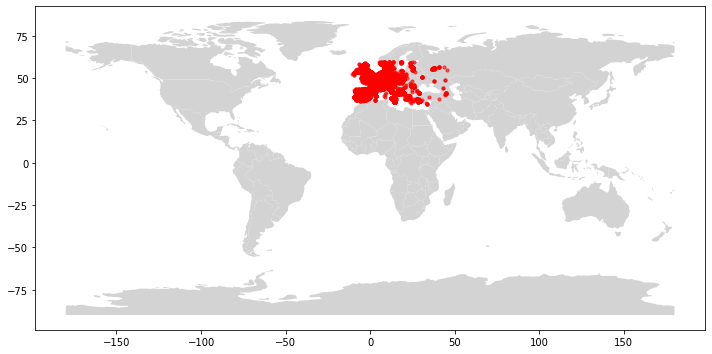

In [37]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

fig, ax = plt.subplots(figsize=(12,6))
worldmap.plot(color="lightgrey", ax=ax)

plt.scatter(training_lon, training_lat, s=10, color='red', alpha=0.6, vmin=0, cmap='autumn')
plt.show()

## Test

In [16]:
test_df = pd.read_csv("/gdrive/MyDrive/GeoEstimation/resources/im2gps_places365.csv")

In [31]:
test_df.head()

,IMG_ID,AUTHOR,LAT,LON,S3_Label,S16_Label,S365_Label,Prob_indoor,Prob_natural,Prob_urban
0,104123223_7410c654ba_19_19355699@N00.jpg,19355699@N00,-16.663606,145.563537,1,8,150,0.002959,0.777815,0.219226
1,1095548455_f636d22cbb_1277_8576809@N08.jpg,8576809@N08,31.893581,-85.141124,2,15,231,0.003976,0.016128,0.979896
2,1185597181_0158ab4213_1311_43616936@N00.jpg,43616936@N00,42.346571,-71.097228,2,12,312,0.000005,0.000004,0.999991
3,1199004207_0ce4e7a456_1285_16418049@N00.jpg,16418049@N00,37.090924,25.370521,2,15,227,0.056002,0.007563,0.936435
4,1257001714_3453f5fc4b_1405_11490799@N08.jpg,11490799@N08,55.485759,28.791046,1,6,205,0.000083,0.991441,0.008475


In [28]:
print(test_df.dtypes)

IMG_ID           object
AUTHOR           object
LAT             float64
LON             float64
S3_Label          int64
S16_Label         int64
S365_Label        int64
Prob_indoor     float64
Prob_natural    float64
Prob_urban      float64
dtype: object


In [33]:
test_lat = test_df['LAT']
test_lon = test_df['LON']

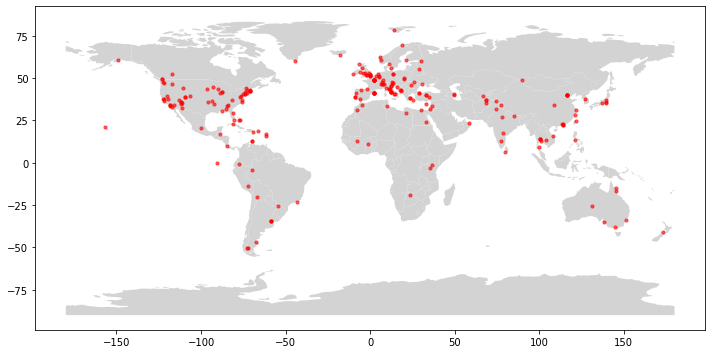

In [36]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

fig, ax = plt.subplots(figsize=(12,6))
worldmap.plot(color="lightgrey", ax=ax)

plt.scatter(test_lon, test_lat, s=10, color='red', alpha=0.6, vmin=0, cmap='autumn')
plt.show()

## Test 3k

In [39]:
test3k_df = pd.read_csv("/gdrive/MyDrive/GeoEstimation/resources/im2gps3k_places365.csv")
print(test3k_df.dtypes)

IMG_ID           object
AUTHOR           object
LAT             float64
LON             float64
S3_Label          int64
S16_Label         int64
S365_Label        int64
Prob_indoor     float64
Prob_natural    float64
Prob_urban      float64
dtype: object


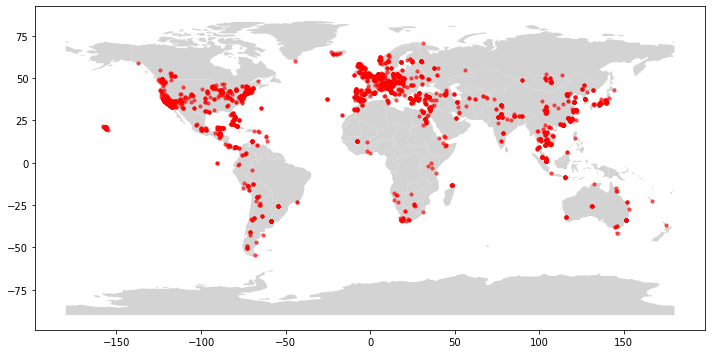

In [40]:
test3k_lat = test3k_df['LAT']
test3k_lon = test3k_df['LON']

worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

fig, ax = plt.subplots(figsize=(12,6))
worldmap.plot(color="lightgrey", ax=ax)

plt.scatter(test3k_lon, test3k_lat, s=10, color='red', alpha=0.6, vmin=0, cmap='autumn')
plt.show()

## Training 25k

In [115]:
training25k_df = pd.read_csv("/gdrive/MyDrive/GeoEstimation/resources/data25k_places365.csv")
print(training25k_df.dtypes)

index             int64
IMG_ID           object
AUTHOR           object
LAT             float64
LON             float64
S3_Label          int64
S16_Label         int64
S365_Label        int64
Prob_indoor     float64
Prob_natural    float64
Prob_urban      float64
url              object
dtype: object


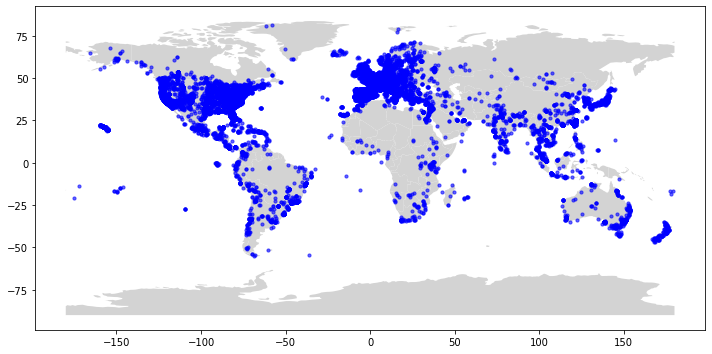

In [116]:
training25k_lat = training25k_df['LAT']
training25k_lon = training25k_df['LON']

worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

fig, ax = plt.subplots(figsize=(12,6))
worldmap.plot(color="lightgrey", ax=ax)

plt.scatter(training25k_lon, training25k_lat, s=10, color='blue', alpha=0.6, vmin=0, cmap='autumn')
plt.show()

## Predicted points

In [16]:
import json
  
# Opening JSON file
#f_original = open('/gdrive/MyDrive/GeoEstimation/resources/im2gps_places365_mapping_h3.json')
f_original = open('/gdrive/MyDrive/GeoEstimation/resources/im2gps3k_places365_mapping_h3.json')
  
# returns JSON object as 
# a dictionary
original_test = json.load(f_original)
original_test_df = pd.DataFrame.from_dict(original_test, orient='index')
original_test_df.reset_index(inplace=True)
original_test_df = original_test_df.rename({'index': 'IMG_ID', 0: 'coarse', 1: 'middle', 2: 'fine'}, axis=1)
#original_test_df['IMG_ID'] = original_test_df['IMG_ID'].str.replace('.jpg', '')

# l'altro è test_df
#test_df = pd.read_csv("/gdrive/MyDrive/GeoEstimation/resources/im2gps_places365.csv")
test_df = pd.read_csv("/gdrive/MyDrive/GeoEstimation/resources/im2gps3k_places365.csv")
smaller_test_df = test_df.loc[:, ['IMG_ID', 'LAT', 'LON']]
#smaller_test_df['IMG_ID'] = smaller_test_df['IMG_ID'].str.replace('.jpg', '')

# predicted
#predicted_test_df = pd.read_csv("/gdrive/MyDrive/GeoEstimation/architectures/base25k-E2/predicted_coordinates.csv")
predicted_test_df = pd.read_csv("/gdrive/MyDrive/GeoEstimation/architectures/base25k-E2/predicted_coordinates3k.csv")
predicted_test_df = predicted_test_df.rename({'img_id': 'IMG_ID'}, axis=1)
predicted_test_df = predicted_test_df[predicted_test_df['p_key']!='hierarchy'] # delete the hierarchy prediction b redundant with fine
predicted_test_df = (predicted_test_df[predicted_test_df['p_key']=='coarse'].merge(predicted_test_df[predicted_test_df['p_key']=='middle'], on='IMG_ID')).merge(predicted_test_df[predicted_test_df['p_key']=='fine'], on='IMG_ID')
predicted_test_df.drop(['p_key_x', 'pred_lat_x', 'pred_lng_x', 'p_key_y', 'pred_lat_y', 'pred_lng_y', 'p_key'], inplace=True, axis=1)
predicted_test_df = predicted_test_df.rename({'pred_class_x': 'pred_coarse', 'pred_class_y': 'pred_middle', 'pred_class': 'pred_fine'}, axis=1)
predicted_test_df['IMG_ID'] = predicted_test_df['IMG_ID'] + '.jpg'

In [17]:
classes_test_df = (predicted_test_df.merge(original_test_df, on='IMG_ID', how='left').dropna()).merge(smaller_test_df, on='IMG_ID', how='left').dropna()

In [18]:
classes_test_df

,IMG_ID,pred_coarse,pred_middle,pred_fine,pred_lat,pred_lng,coarse,middle,fine,LAT,LON
0,1000269685_e60e9cdfb4_1125_78841376@N00.jpg,192,3350,6600,32.765961,-117.228317,2323.0,3970.0,5249.0,32.325436,-64.764404
1,1000304467_1a75a200b1_1296_78841376@N00.jpg,192,3970,5249,32.308949,-64.774719,2323.0,3970.0,5249.0,32.325436,-64.764404
2,1001048550_8e4b47d165_1051_78841376@N00.jpg,317,2827,4481,-33.863529,151.218307,2323.0,3970.0,5249.0,32.325436,-64.764404
3,1005977048_5ccf8b05d3_1201_91728102@N00.jpg,617,105,326,35.313374,139.539703,3104.0,6469.0,10864.0,29.976052,122.390356
4,1008804117_ce4e6fef8a_1349_97522422@N00.jpg,473,514,527,40.769627,-119.217957,1374.0,1815.0,2002.0,46.478536,30.758714
...,...,...,...,...,...,...,...,...,...,...,...
2959,99078324_9d8e7a3975_28_44972214@N00.jpg,1781,4094,5473,32.843647,-117.275940,192.0,198.0,199.0,32.759562,-117.180175
2960,99101189_a518846673_43_50517642@N00.jpg,864,1006,10029,7.321428,134.455292,428.0,1099.0,4606.0,12.500541,-70.010590
2961,99115715_1bdd45ca71_19_50517642@N00.jpg,450,485,7719,27.974140,-82.829437,428.0,1099.0,4606.0,12.564004,-70.051864
2962,995674057_2360a67996_1182_98545448@N00.jpg,333,354,4730,51.696236,-1.802698,333.0,354.0,4730.0,51.682462,-1.786330


**Coarse**

In [19]:
right_coarse = classes_test_df[classes_test_df['pred_coarse']==classes_test_df['coarse']]
wrong_coarse = classes_test_df[classes_test_df['pred_coarse']!=classes_test_df['coarse']]

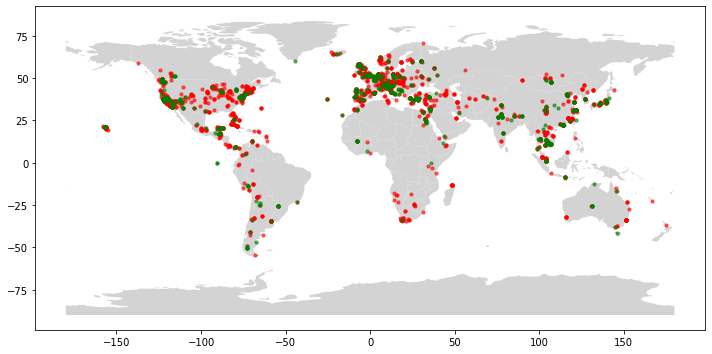

In [117]:
right_coarse_lat = right_coarse['LAT']
right_coarse_lon = right_coarse['LON']
wrong_coarse_lat = wrong_coarse['LAT']
wrong_coarse_lon = wrong_coarse['LON']

worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

fig, ax = plt.subplots(figsize=(12,6))
worldmap.plot(color="lightgrey", ax=ax)

plt.scatter(wrong_coarse_lon, wrong_coarse_lat, s=10, color='red', alpha=0.6, vmin=0)
plt.scatter(right_coarse_lon, right_coarse_lat, s=10, color='green', alpha=0.6, vmin=0)
plt.show()

In [43]:
import pandas as pd
from PIL import Image
from IPython.display import clear_output
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import os
from matplotlib import image

In [95]:
def sample_list_images(category, number=12):
  '''
  category = 'right'/1 or 'wrong'/0
  '''
  img_list = []
  img_df = pd.DataFrame()
  if (category=='right') or (category==1):
    sample = right_coarse.sample(n=number, random_state=123)['IMG_ID']
     
  else:
    sample = wrong_coarse.sample(n=number, random_state=123)['IMG_ID']

  for img in sample:
    path = "/gdrive/MyDrive/GeoEstimation/resources/images/im2gps3k/{}".format(img)
    img_list.append(image.imread(path))

  #img_df['img_ID']=sample
  img_df['img']=img_list

  return img_df

In [96]:
img_df = sample_list_images('wrong', 18)
img_df['type']=[2, 1, 1, 0, 2, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0]

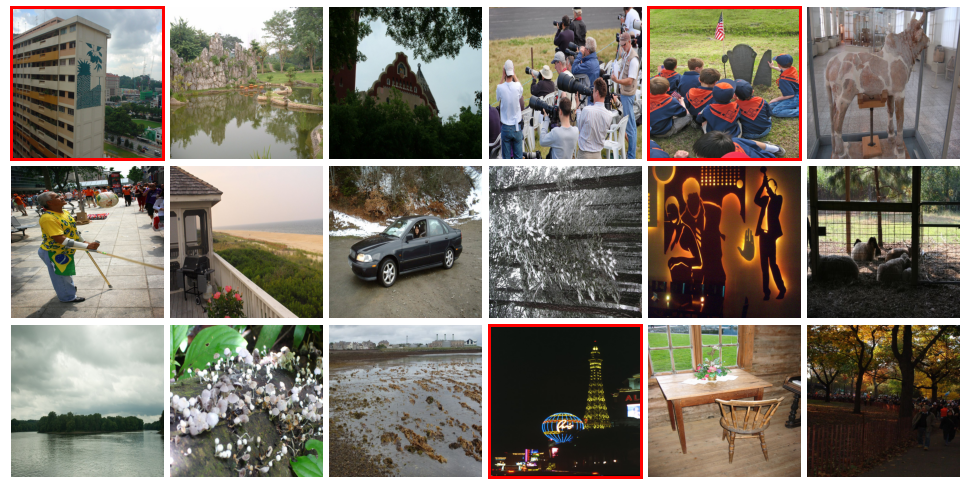

In [107]:
fig = plt.figure(figsize=(17, 20))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 6),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

extent = [0, 1, 0, 1] #so all the images have the same dimension
for ax, im in zip(grid, img_df.index.values):
    # Iterating over the grid returns the Axes.
    ax.imshow(img_df.loc[im, 'img'], extent=extent)
    lcz = img_df.loc[im, 'type']
    if lcz == 2:
      for spine in ax.spines.values(): #set the color for the edges
        spine.set_edgecolor('red')
        spine.set_linewidth(3)
    else:
      ax.axis('off')


    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [104]:
img_df2 = sample_list_images('right', 18)
img_df2['type']=[2, 2, 0, 1, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1]

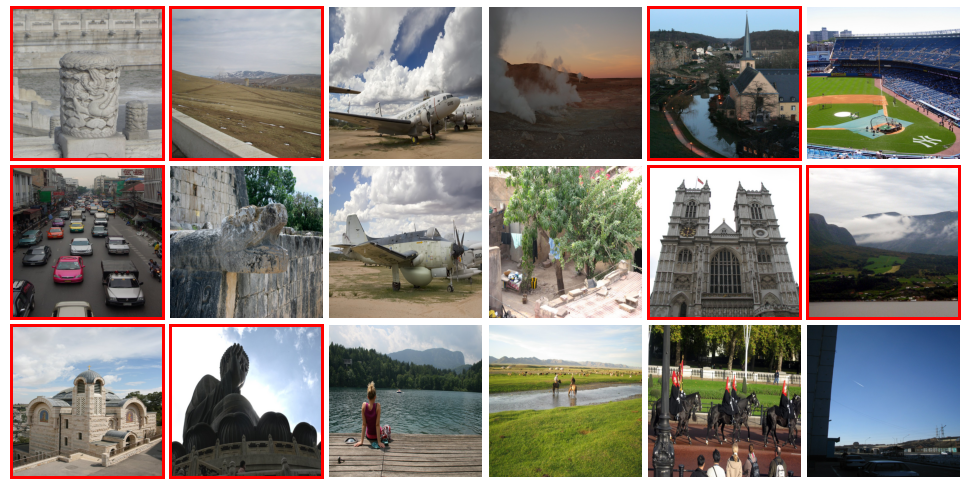

In [112]:
fig = plt.figure(figsize=(17, 20))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 6),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

extent=[0, 1, 0, 1] #so all the images have the same dimension
for ax, im in zip(grid, img_df2.index.values):
    # Iterating over the grid returns the Axes.
    ax.imshow(img_df2.loc[im, 'img'], extent=extent)
    lcz = img_df2.loc[im, 'type']
    if lcz == 2:
      for spine in ax.spines.values(): #set the color for the edges
        spine.set_edgecolor('red')
        spine.set_linewidth(3)
    else:
      ax.axis('off')


    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

**Middle**

In [10]:
right_middle = classes_test_df[classes_test_df['pred_middle']==classes_test_df['middle']]
wrong_middle = classes_test_df[classes_test_df['pred_middle']!=classes_test_df['middle']]

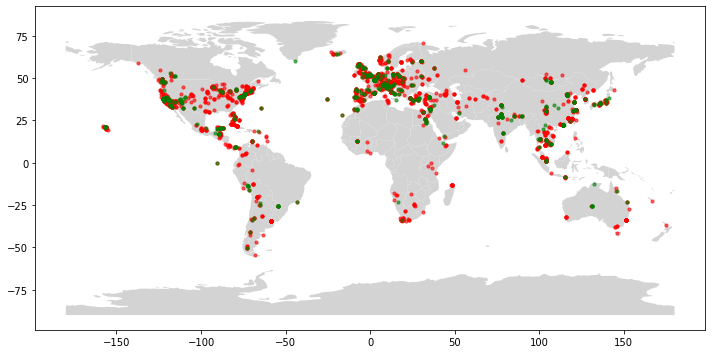

In [11]:
right_middle_lat = right_middle['LAT']
right_middle_lon = right_middle['LON']
wrong_middle_lat = wrong_middle['LAT']
wrong_middle_lon = wrong_middle['LON']

worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

fig, ax = plt.subplots(figsize=(12,6))
worldmap.plot(color="lightgrey", ax=ax)

plt.scatter(wrong_middle_lon, wrong_middle_lat, s=10, color='red', alpha=0.6, vmin=0)
plt.scatter(right_middle_lon, right_middle_lat, s=10, color='green', alpha=0.6, vmin=0)
plt.show()

**Fine**

In [12]:
right_fine = classes_test_df[classes_test_df['pred_fine']==classes_test_df['fine']]
wrong_fine = classes_test_df[classes_test_df['pred_fine']!=classes_test_df['fine']]

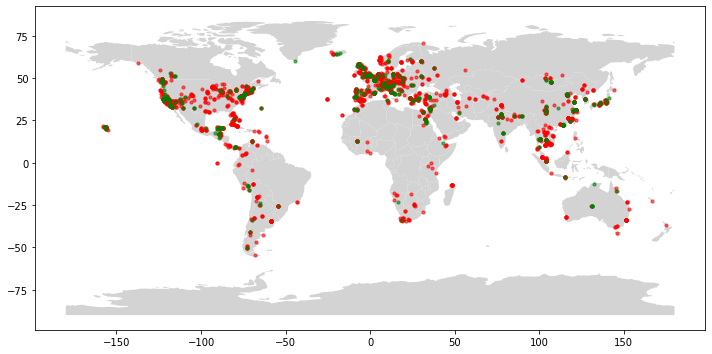

In [13]:
right_fine_lat = right_fine['LAT']
right_fine_lon = right_fine['LON']
wrong_fine_lat = wrong_fine['LAT']
wrong_fine_lon = wrong_fine['LON']

worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

fig, ax = plt.subplots(figsize=(12,6))
worldmap.plot(color="lightgrey", ax=ax)

plt.scatter(wrong_fine_lon, wrong_fine_lat, s=10, color='red', alpha=0.6, vmin=0)
plt.scatter(right_fine_lon, right_fine_lat, s=10, color='green', alpha=0.6, vmin=0)
plt.show()